In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob 
import matplotlib.image as mpimg
from IPython.core.debugger import set_trace
import pickle
%matplotlib inline

In [81]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
#     gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    else:
        sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    abs_sobel = np.absolute(sobel)
    gradient = (255*abs_sobel/np.max(abs_sobel))
    
    grad_binary = np.zeros_like(gradient)
    grad_binary[(gradient >= thresh[0]) & (gradient <= thresh[1])] = 1
    return grad_binary

def hls_threshold(s_channel, s_thresh_min = 100, s_thresh_max = 255):

    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    
    return s_binary

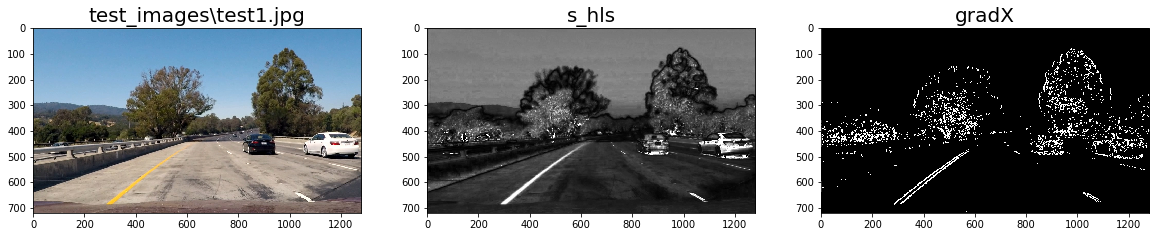

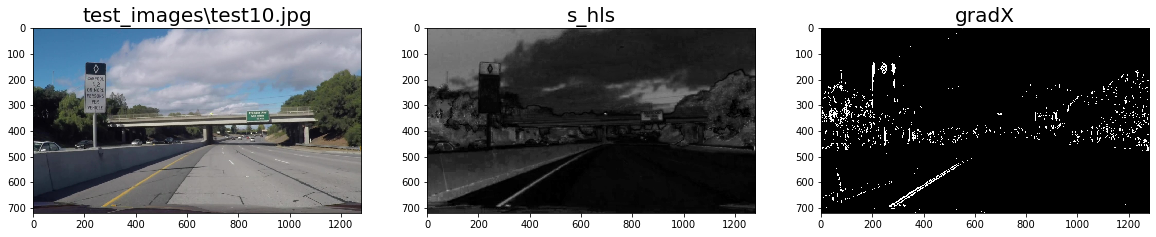

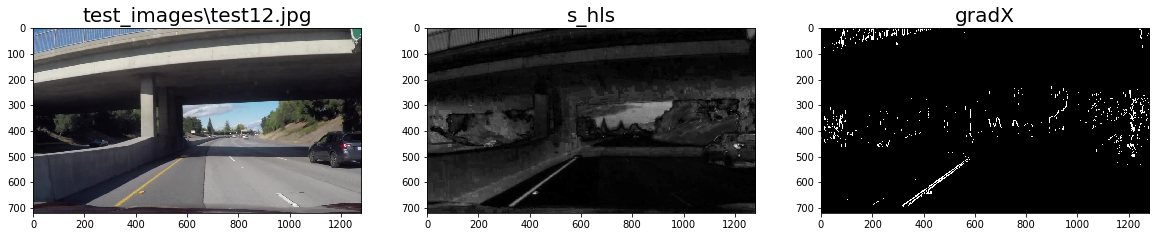

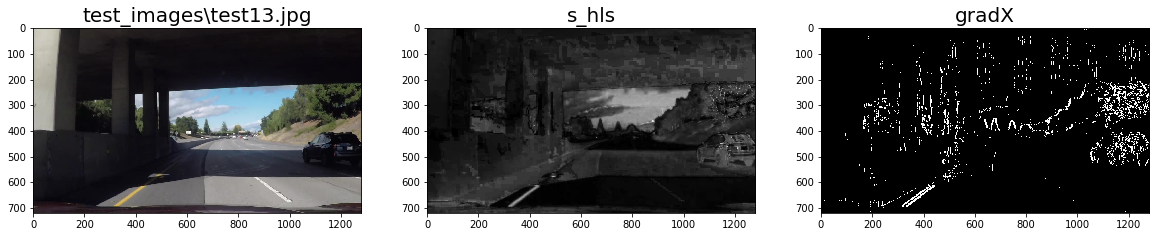

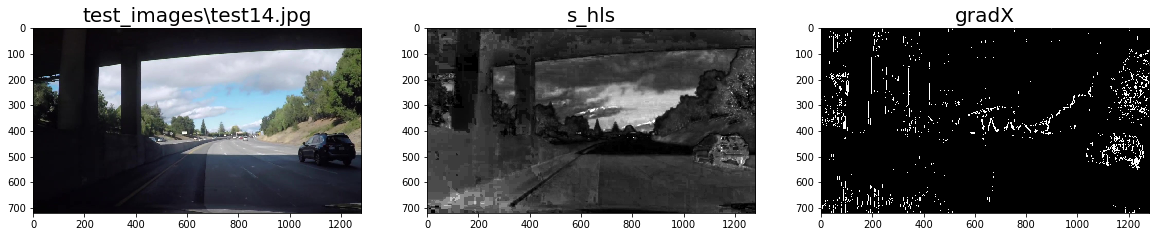

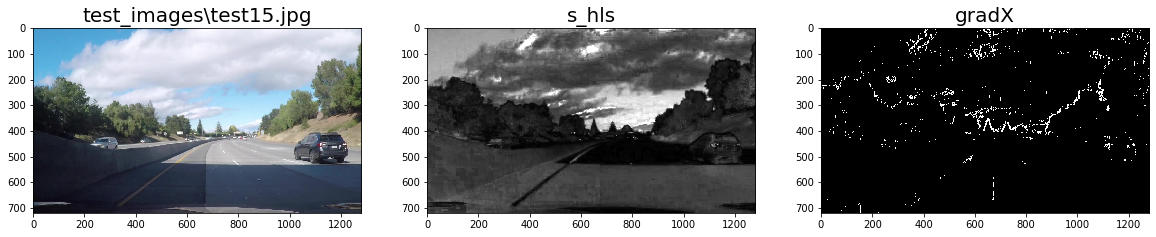

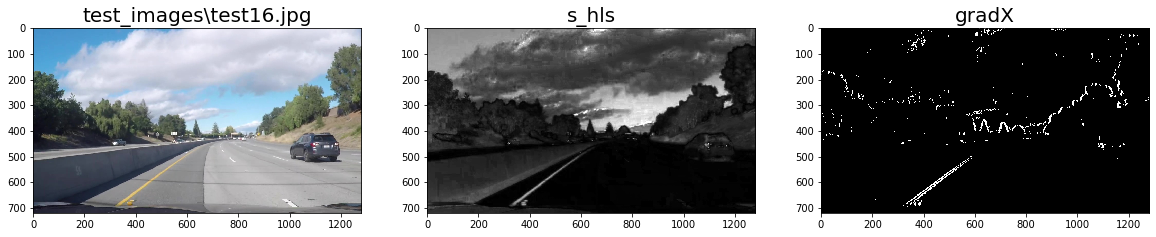

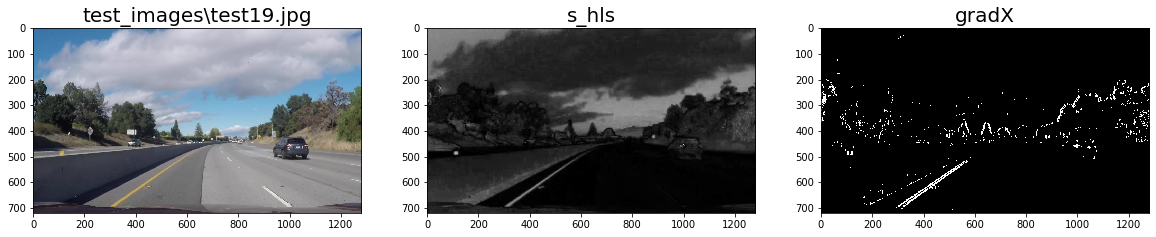

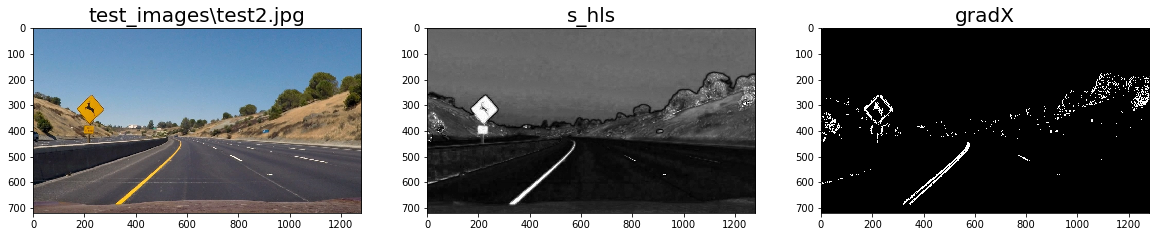

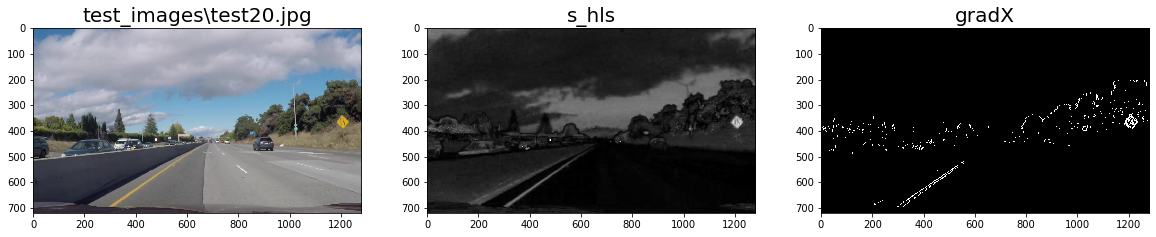

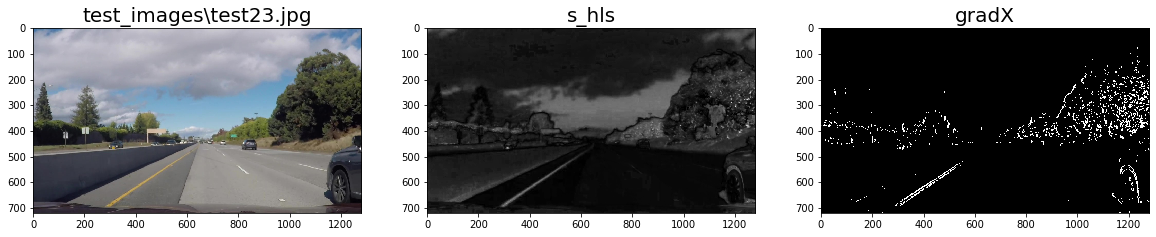

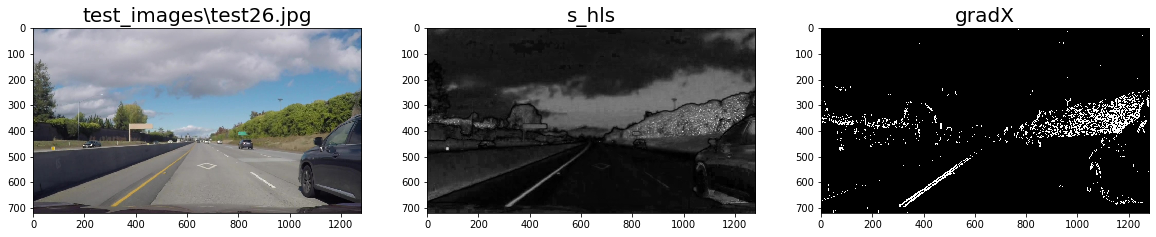

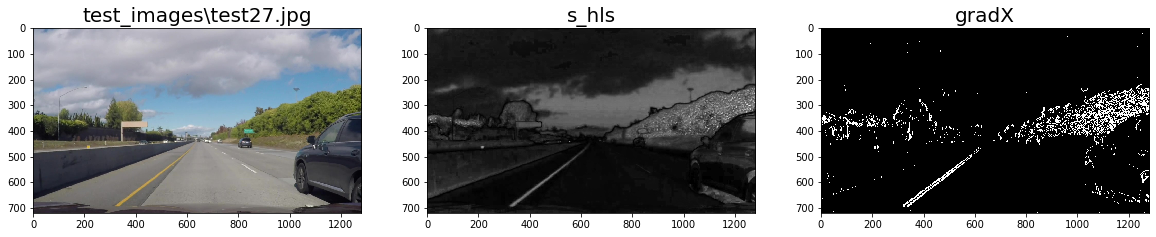

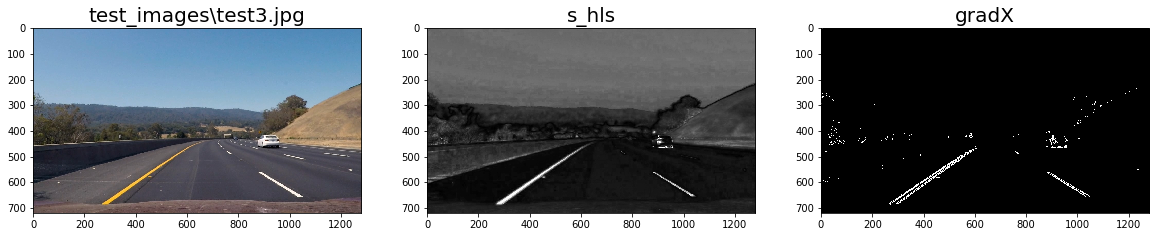

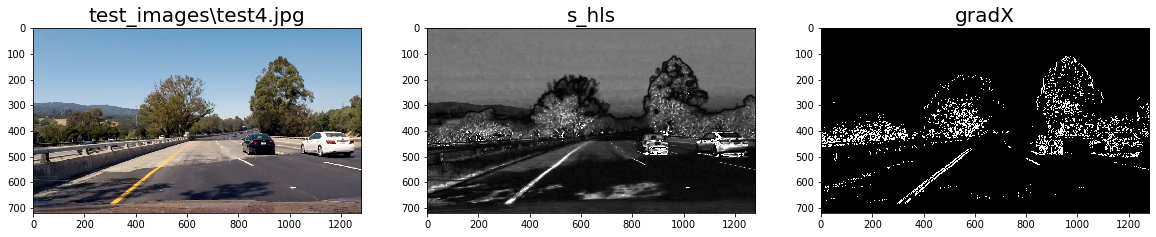

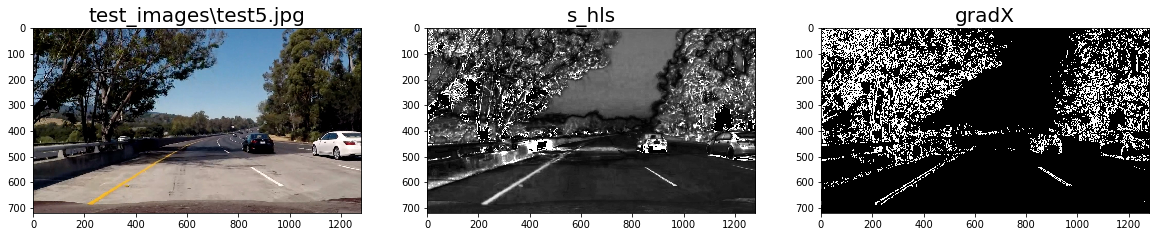

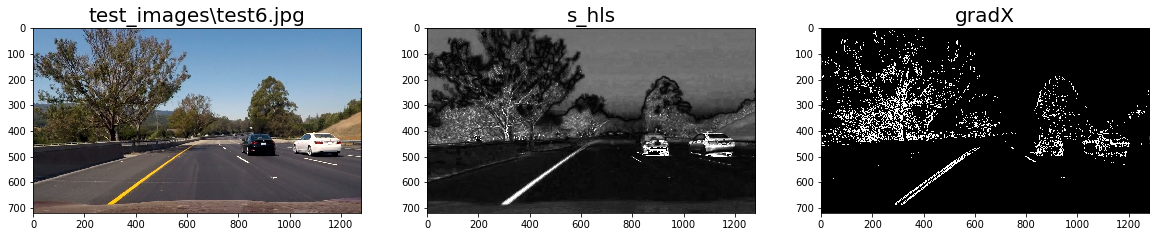

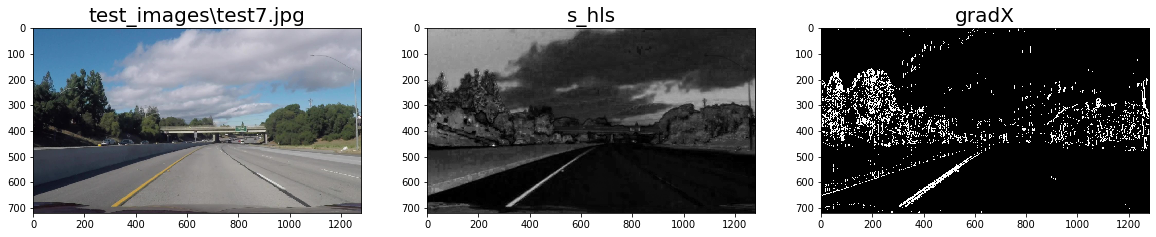

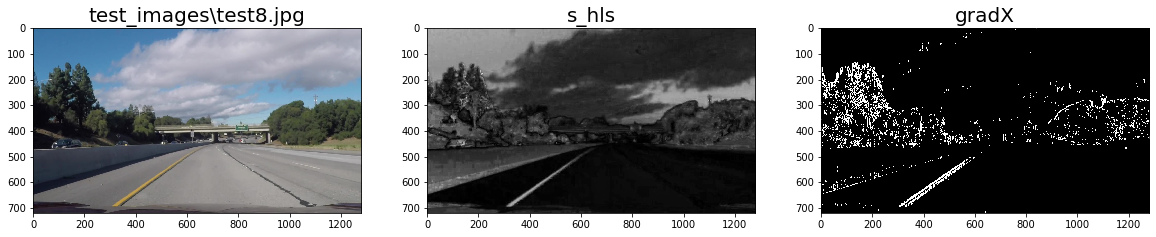

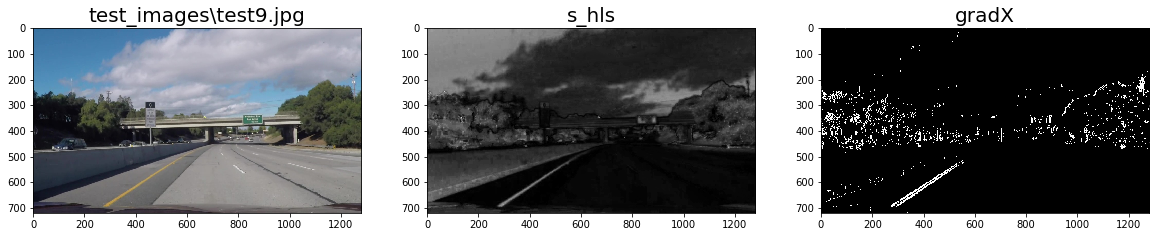

In [86]:
images = glob.glob('test_images/test*.jpg')
for img in images:
    
    image = mpimg.imread(img) 
    blurred = cv2.GaussianBlur(image, (3,3), 0)
    
    hls_image = cv2.cvtColor(blurred, cv2.COLOR_RGB2HLS)

    s_hls = hls_image[:,:,2]
    
    gradX = abs_sobel_thresh(s_hls, orient='x', sobel_kernel=3, thresh=(20, 255))
    

#     plt.figure()
    f, ax = plt.subplots(1, 3, figsize=(20, 20))
    ax[0].imshow(image)
    ax[0].set_title(img, fontsize=20)
    ax[1].imshow(s_hls, cmap='gray' )
    ax[1].set_title('s_hls', fontsize=20)
    ax[2].imshow(gradX, cmap='gray' )
    ax[2].set_title('gradX', fontsize=20)   

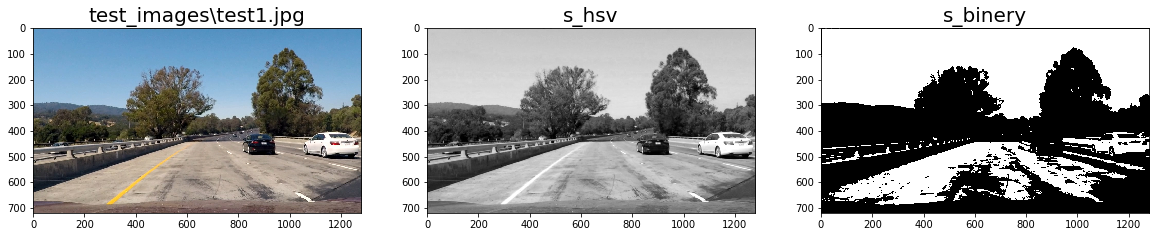

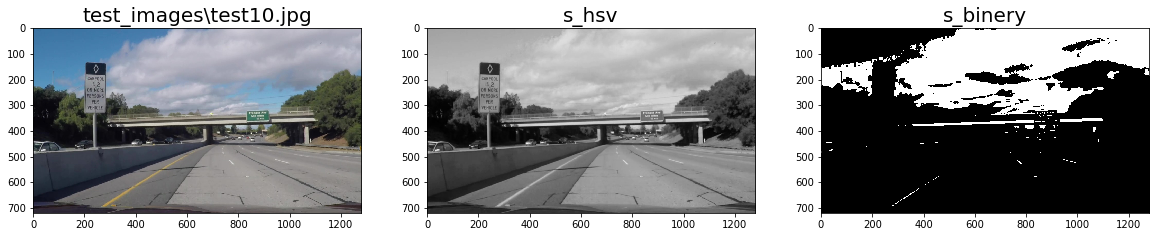

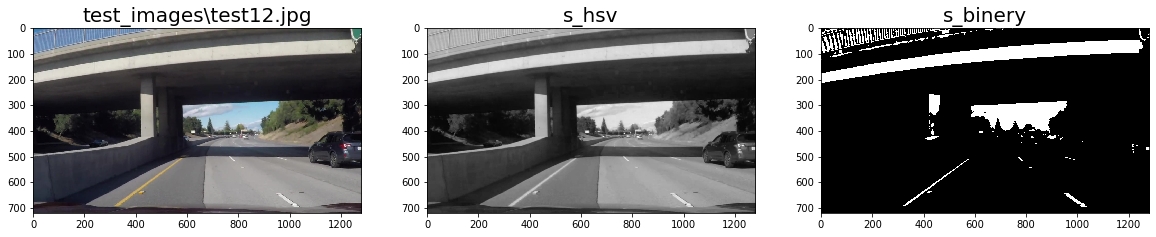

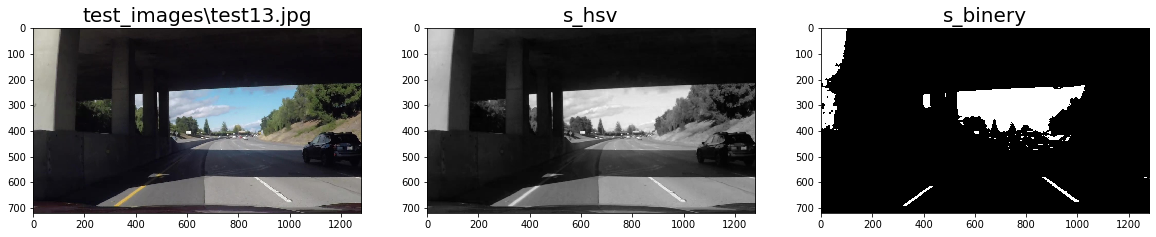

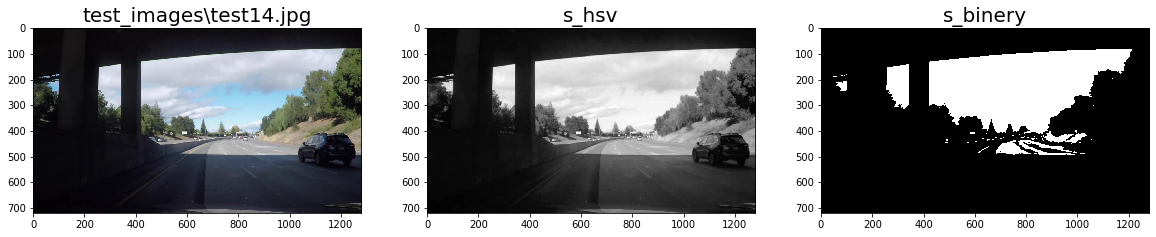

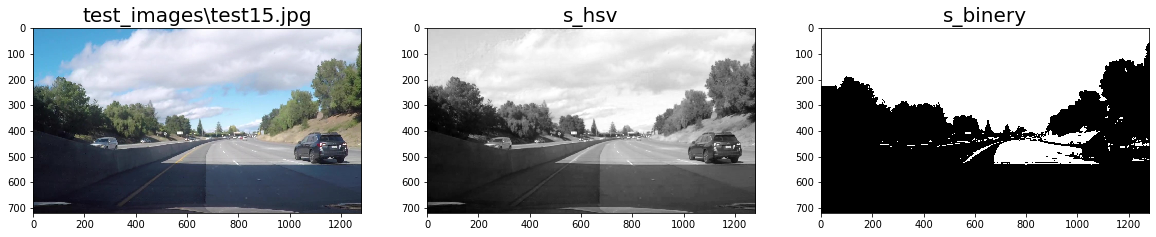

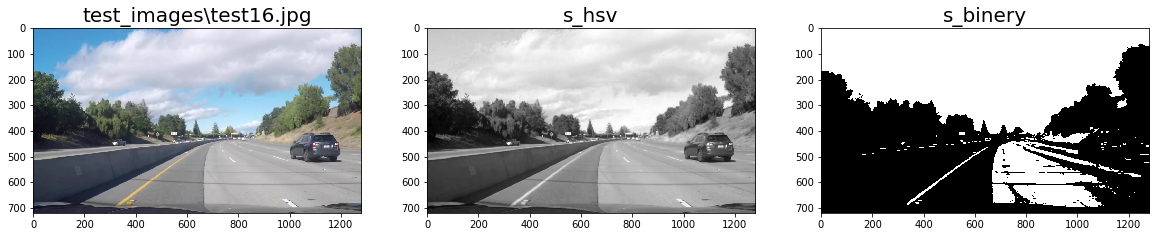

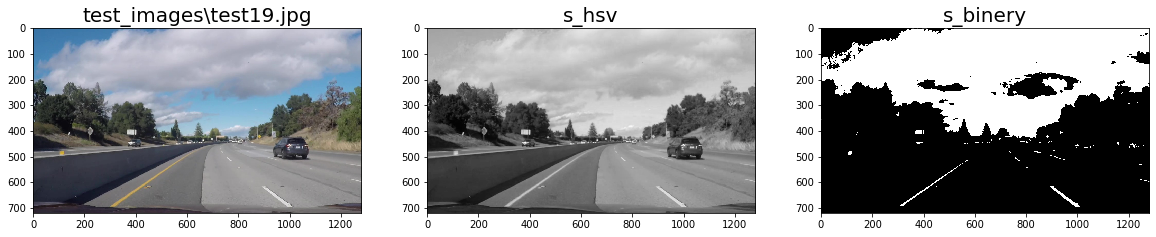

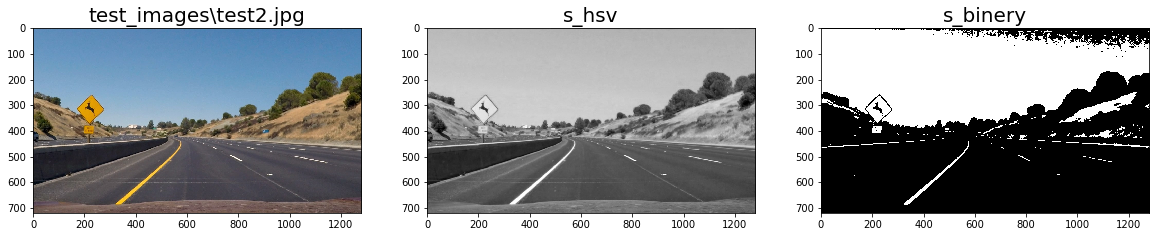

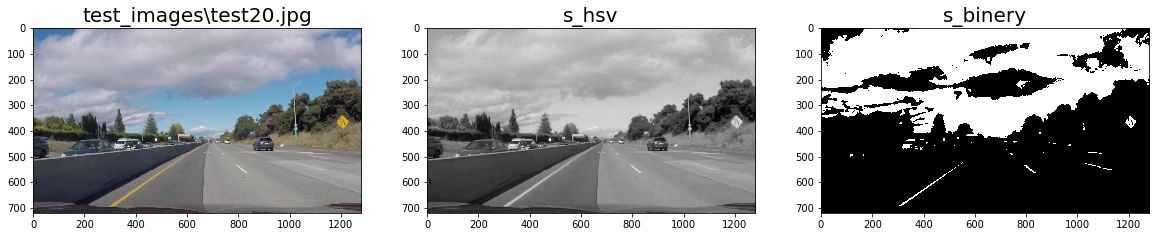

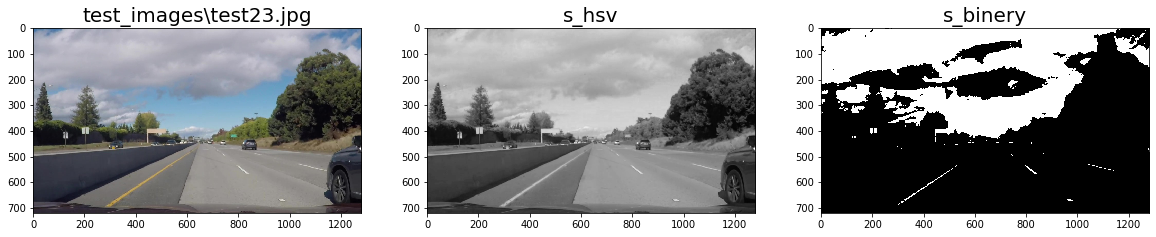

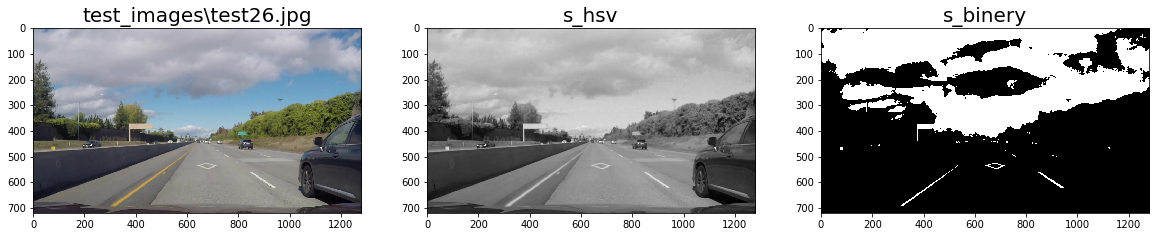

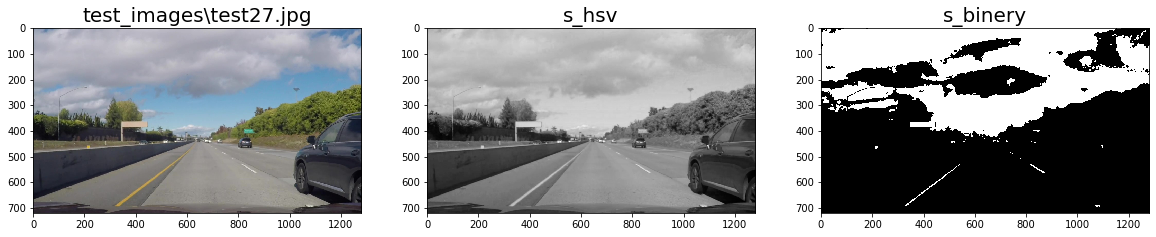

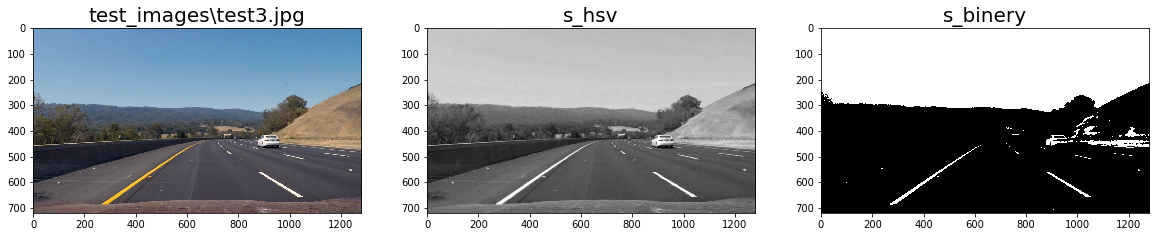

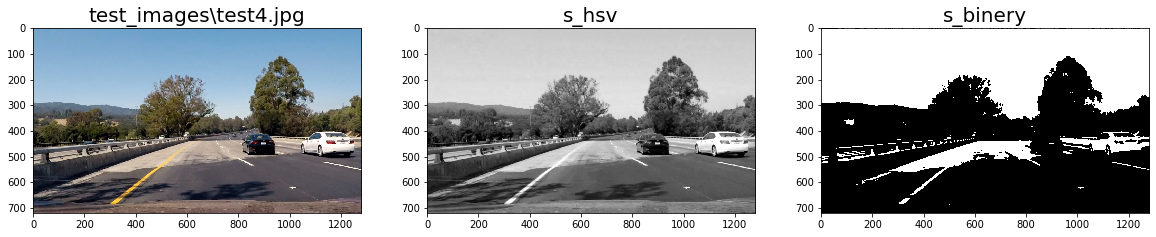

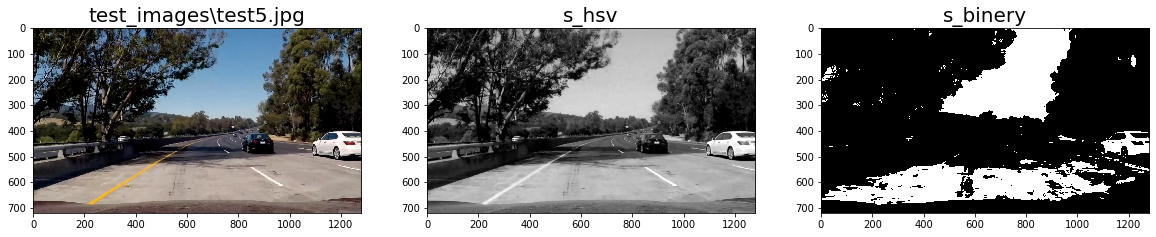

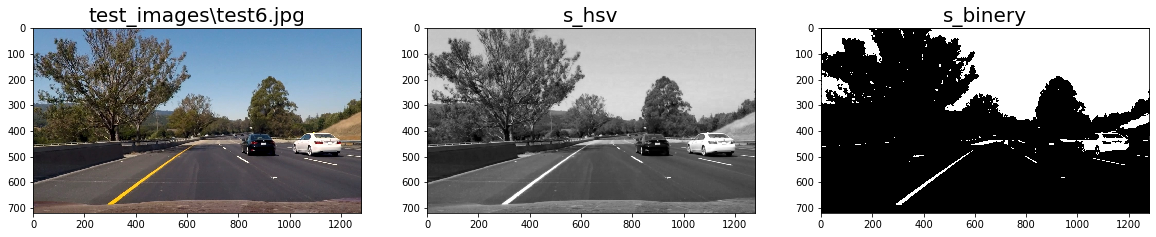

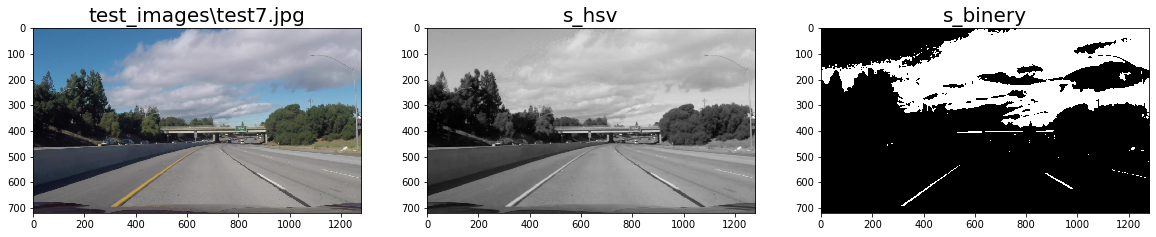

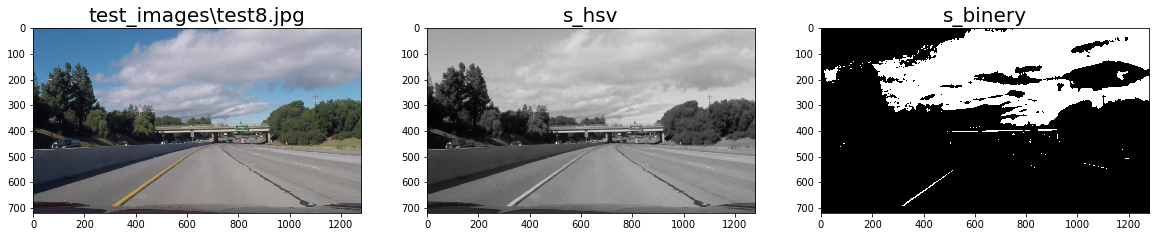

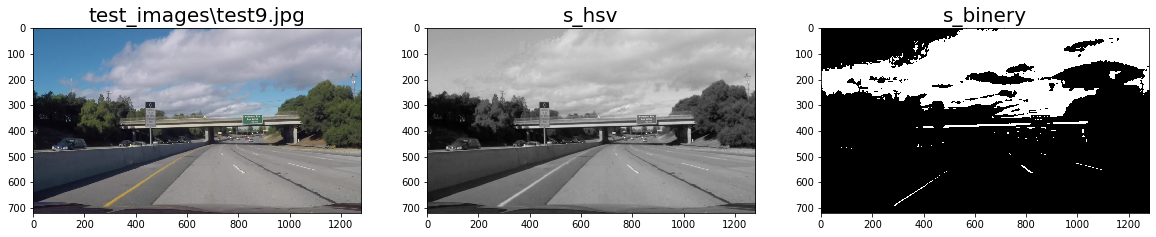

In [76]:
images = glob.glob('test_images/test*.jpg')
for img in images:
    
    image = mpimg.imread(img) 
    blurred = cv2.GaussianBlur(image, (3,3), 0)
    hsv_image = cv2.cvtColor(blurred, cv2.COLOR_RGB2HSV)

    s_hsv = hsv_image[:,:,2]
    s_binery = hls_threshold(s_hsv, s_thresh_min = 180, s_thresh_max = 255)

    #     plt.figure()
    f, ax = plt.subplots(1, 3, figsize=(20, 20))
    ax[0].imshow(image)
    ax[0].set_title(img, fontsize=20)
    ax[1].imshow(s_hsv, cmap='gray' )
    ax[1].set_title('s_hsv', fontsize=20)
    ax[2].imshow(s_binery, cmap='gray' )
    ax[2].set_title('s_binery', fontsize=20)   